# Lab 1: My First Neural Network (Diabetes Prediction)

## Preamble: What is this?
This is a Jupyter Notebook. It is like a physical notebook with text and images, but it also runs python scripts. We are hosting this notebook in the cloud on Google Colab. Later, if you are using Machine Learning algorithms in your own research you will probably run python scripts locally on your own computer, or perhaps even a super-computer. For learning however a notebook can be useful. It allows us to provide helpful information besides all the code. Running it on Google Colab allows us to get started without any installation burdens on your local device.

In  a notebook there are two types of fields, a text field (in markdown) like this one. And a code field, with python code, like the one below here. Python is a programming language like R. It can run algorithms and do calculations. You can run a code cell using the play button (or ctrl+enter).

In [1006]:
1 + 1 

2

Python also comes with many add-ons, prefabricated libraries of code, known as modules. These modules make doing complex things simple. We can import them using `import`

In [1007]:
# for example the datetime module provides a bunch of code to work with dates and times
import datetime
datetime.date.today() + datetime.timedelta(days=7)  # this makes time arithmetic easy!

datetime.date(2026, 2, 13)

Throughout this course we will be working with a bunch of famous machine learning modules, let's import them now. We will get into what they all do later, once we use them.

In [1008]:
import numpy, pandas, torch, sklearn, matplotlib.pyplot as plt

## Assignment: Predicting Diabetes

For this class we will be training a neural network to predict diabetes based on factors like blood pressure, insulin and glucose levels. In order to train a model and make predictions, first we will need some data. We need data both to train a model, training data, as well as to test it's performance, test data.

In this notebook we will be using the [Pima Indians Diabetes Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database). This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Loading and Exploring the dataset
Let's load the dataset from the web. See if you can make sense from these lines of code

In [1009]:
# the dataset is as a Comma Seperated Values (csv) file hosted on GitHub at this URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# we declase the column names since the csv file does not have a header row
headers = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age', 'Diabetes']
# we use pandas to read the csv file into a DataFrame, which is a tabular data structure with rows and columns
dataset = pandas.read_csv(url, names=headers)
dataset.head()  # df.head() shows the first 5 rows of the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


We have now loaded our dataset as a [Pandas](https://pandas.pydata.org/) Dataframe. A dataframe is like a table, but more dynamic and malleable. We can do things like sorting and filtering the table, just like in Excel.

In [1010]:
# sort by age
dataset.sort_values(by='Age')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Diabetes
255,1,113,64,35,0,33.6,0.543,21,1
60,2,84,0,0,0,0.0,0.304,21,0
102,0,125,96,0,0,22.5,0.262,21,0
182,1,0,74,20,23,27.7,0.299,21,0
623,0,94,70,27,115,43.5,0.347,21,0
...,...,...,...,...,...,...,...,...,...
123,5,132,80,0,0,26.8,0.186,69,0
684,5,136,82,0,0,0.0,0.640,69,0
666,4,145,82,18,0,32.5,0.235,70,1
453,2,119,0,0,0,19.6,0.832,72,0


In [1011]:
# filter rows where glucose > 120
dataset[dataset['Glucose'] > 120]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
...,...,...,...,...,...,...,...,...,...
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


### Excercise 1: Make yourself familiar with the datset.
a) To get yourself familiar with the dataset let's explore the dataframe a bit. For each column write down what it signifies, including units. You will have to look this up online.

* Pregnancies: Total number of times pregnant (#)
* Glucose: Plasma glucose concentration (2-hour OGTT) (mg/dL)
* BloodPressure: ... (..)
* SkinThickness: ... (..)
* Insulin: ... (..)
* BMI: ... (..)
* DPF: ... (..)
* Age: ... (..)
* Diabetes: ... (..)

b) Explore the dataset to answer the following questions:
1. What is the maximum number of pregnancies a woman endured in the dataset?
2. Who is the mean age of the individuals in the dataset?
3. How many people have diabetes?


In [1012]:
#Free Code Field for exercise 1


In [1013]:
# insert your answers to 1b) here
max_pregnancies = ...
mean_age = ...
num_diabetes = ...

If you like you can check your answers using this line of code:

In [1014]:
# this line of code is obfuscated by design, no need to understand it, just run it to check your answers
import answers; assert max_pregnancies == answers.max_pregnancies, "Something is wrong with your answer for max_pregnancies"; numpy.testing.assert_approx_equal(mean_age, answers.mean_age); assert num_diabetes == answers.num_diabetes, "Something is wrong with your answer for num_diabetes"; print("All answers are correct!")

AssertionError: Something is wrong with your answer for max_pregnancies

Let's inspect our data through histograms. Run the line below to display 9 histograms.

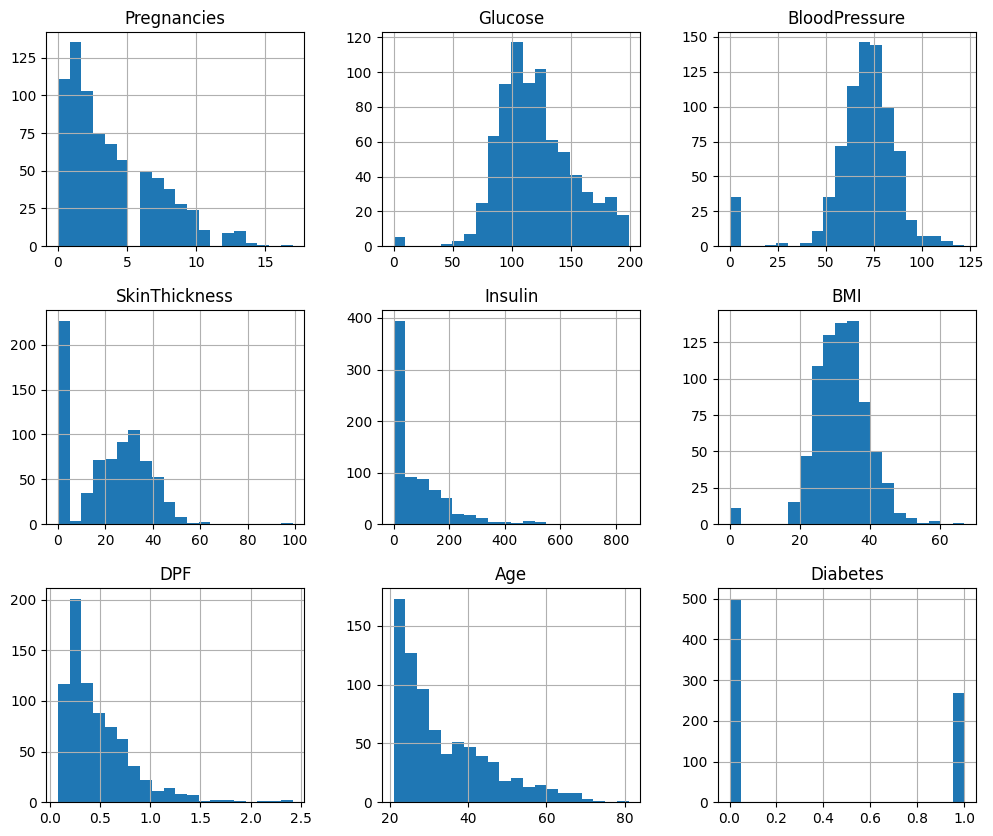

In [ ]:
dataset.hist(figsize=(12, 10), bins=20); plt.show()

### Data Preparation
Based on what you know now about the dataset, what columns should be the features X, and what column should be the target y?

In [ ]:
target_column = "Diabetes"
X = dataset.drop(columns=[target_column]).values
y = dataset[target_column].values

As we learned in class we need to split our data into a train and a test set. Normally we would also need a validation set to test your model during prototyping. Since this is not a real experiment, we will keep things simple and split only into a train and test set.

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

It is very important that data is normalized before running any deep learning model fitting. Neural Networks prefer standard normal data. For this we will use a rescaler.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = torch.FloatTensor(scaler.fit_transform(X_train))
X_test = torch.FloatTensor(scaler.transform(X_test))
y_train = torch.FloatTensor(y_train).view(-1, 1)
y_test = torch.FloatTensor(y_test).view(-1, 1)

Let's plot that data again. What do you notice? What happened to the 9th histogram? Did all our normalization operations succeed? What are the spikes we see? If you want you can take some time to improve your data pre-processing pipeline and use these plots to check their effect. Once you feel ready, move on.

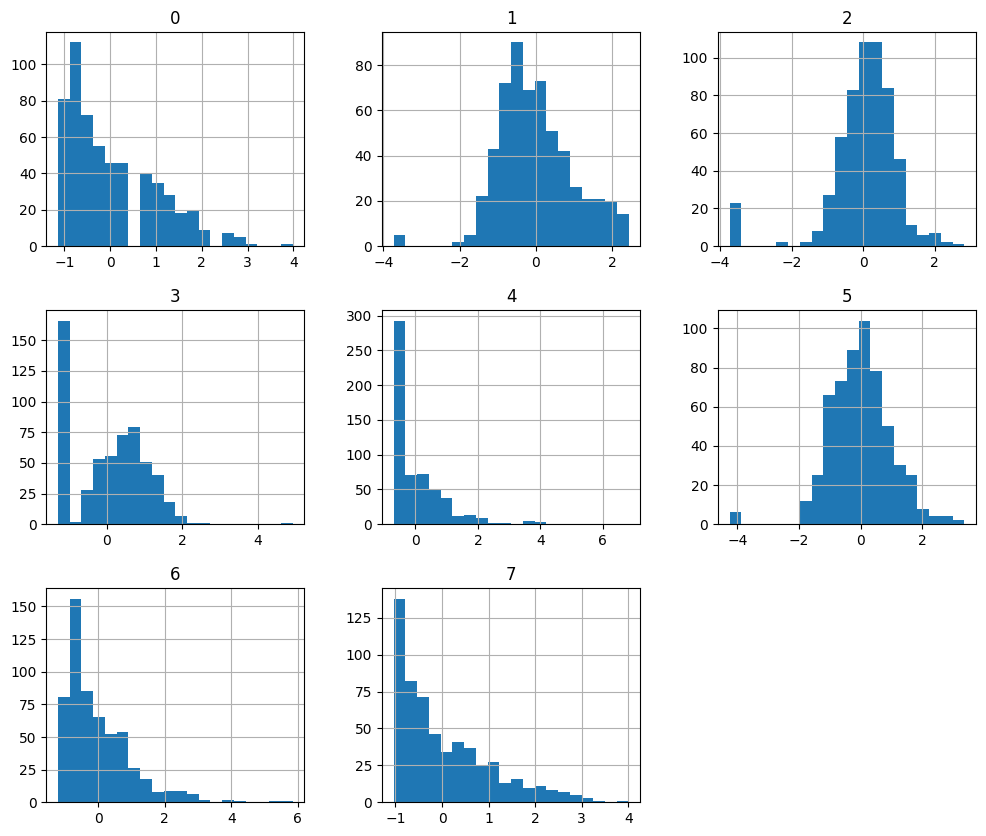

In [ ]:
# plot histograms
pandas.DataFrame(X_train).hist(figsize=(12, 10), bins=20); plt.show()

### The Neural Network

Let's get to the heart of this notebook: We are going to build a model to make predictions: The Multi-Layer Perceptron. This is a fancy term for a standard feed-forward neural network.

Think of a neural network like a committee of doctors looking at a patient's chart:

1.  **Input Layer:** These are the numbers on the chart (Glucose, Age, BMI, etc.). We have 8 charts (features), so our input layer needs 8 nodes.
2.  **Hidden Layer:** These are the junior doctors. They look at combinations of the inputs to find patterns (e.g., "High age + High BMI" might be a specific risk factor). We will use **12 neurons** here. Why 12? It's a design choice; enough to learn patterns, but not so big that it memorizes the data.
3.  **Activation Function (ReLU):** This introduces non-linearity. Without it, the network is just a linear regression line. It decides if a neuron "fires" or stays silent.
4.  **Output Layer:** This is the head doctor. They take the insights from the junior doctors and make a final recommendation: How confident are we the patient has diabetes? 
5.  **Output Activation (Sigmoid):** This squashes the final number into a probability between 0 and 1.

We will build our model using the pytorch module. PyTorch is an open-source machine learning framework for building and training neural networks using Python. It behaves very similar to numpy, making models easy to write, debug, and experiment with. PyTorch is widely used in both research and production and integrates tightly with GPUs and modern deep learning tooling.

In [ ]:
import torch.nn as nn

class DiabetesClassifier(nn.Module):
    def __init__(self, input_dim, n_hidden, output_dim):
        super(DiabetesClassifier, self).__init__()
        # these are all the building blocks of our network
        self.hidden_layer = nn.Linear(input_dim, n_hidden) 
        self.relu = nn.ReLU()
        self.output = nn.Linear(n_hidden, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.hidden_layer(x))
        x = self.sigmoid(self.output(x))
        return x

Now that we have defined our model architecture. Let's build it. Defining our model requires 3 parameters: The input dimension, number of hidden neurons and output dimension. Some of these are set by the data we are dealing with, some are free design choices. Based on what you learned in class, what are the number of input nodes, hidden nodes and output nodes?

In [ ]:
input_dim = ...
n_hidden = ...  # this is a free hyperparameter, you can change it to whatever you see fit
output_dim = ...

model = neural_network = DiabetesClassifier(input_dim, n_hidden, output_dim)

To test you understanding of the model, how many configurable parameters (or weights) does this model have?

In [ ]:
total_number_of_parameters = ...

Check you answer by running the cell below

In [ ]:
assert total_number_of_parameters == answers.num_of_parameters(model)

We now have a model, but it is currently "dumb"—it has not learned anything yet. To train it, we need two things:

1.  **Criterion (Loss Function):** A way to measure how wrong the model is. Since we are doing binary classification (0 or 1), we use **Binary Cross Entropy (BCELoss)**. If the model predicts 0.9 (Diabetes) but the true answer is 0 (No Diabetes), the Loss will be high. If the model predicts 0.1 and the true answer is 0, the loss will be low.
2.  **Optimizer:** A way to update the model to make it less wrong next time. We will use **Adam**, a very popular optimizer that adjusts the learning rate automatically.

In [ ]:
import torch.optim as optim
criterion = nn.BCELoss() # Binary Cross Entropy
optimizer = optim.Adam(model.parameters(), lr=0.01)

### The Training Process

This is where the magic happens. We will force the model to look at the data 100 times (100 **Epochs**). In every single epoch, the following steps happen:

1.  **Forward Pass:** The model makes a guess based on it's current weights.
2.  **Calculate Loss:** We check how wrong that guess was compared to `y_train`.
3.  **Backward Pass (Backpropagation):** We calculate which weights contributed to the error.
4.  **Step:** The optimizer nudges the weights in the opposite direction of the error to improve accuracy.

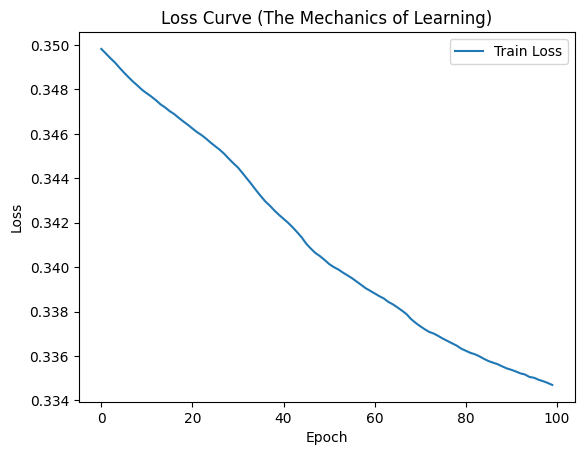

In [ ]:
losses = []
eval_losses = []
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

plt.plot(losses, label='Train Loss')
plt.title("Loss Curve (The Mechanics of Learning)")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

Take your time now to play around with the free hyperparameters, and see how they adjust our training dynamics. Make sure to re-run the entire notebook after you adjust something using the Run All button up above.

## Prediction
Let's make some predicitons! Play around with this datapoint and see how to model's predicitons change based on the input.

In [ ]:
pregnancies = 3
glucose = 80
blood_pressure = 70
skin_thickness = 20
insulin = 79.0
bmi = 32.0
dpf = 0.5
age = 21

patient_info = torch.FloatTensor([pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age])
# don't forget to scale the datapoint!
patient_info = scaler.transform(patient_info.view(1, -1))

prediction = model(torch.FloatTensor(patient_info)).item()
print(prediction)


0.013435198925435543


The model has been trained! But how well does it diagnose patients it has never seen before? We held back `X_test` for this exact moment.

We need to:
1. Turn off the gradient calculation (we aren't training anymore, just testing).
2. Pass the test data through the model.
3. Round the results (since the model outputs a probability like 0.78, we round it to 1 for Diabetes).

In [ ]:
# make predictions
with torch.no_grad():
    
    test_set_predictions = model(X_test).round()
    test_accuracy = sum(test_set_predictions == y_test) / len(y_test)

    train_set_predictions = model(X_train).round()
    train_accuracy = sum(train_set_predictions == y_train) / len(y_train)
    print(f"Train Accuracy: {train_accuracy.item():.2f}")
    print(f"Test Accuracy: {test_accuracy.item():.2f}")


Train Accuracy: 0.80
Test Accuracy: 0.77


Let's also look at the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = test_set_predictions.numpy()
cm = confusion_matrix(y_test, y_pred)
cm_df = pandas.DataFrame(cm, index=["True Negative", "True Positive"], columns=["Predicted Negative", "Predicted Positive"])
cm_df

,Predicted Negative,Predicted Positive
True Negative,106,16
True Positive,29,41


## Conclusion
You have successfully built, trained, and evaluated your first neural network! An accuracy around 75-80% is typical for this dataset with a simple model. 

**To explore further:**
1. Try changing the number of neurons in the hidden layer (from 12 to 32 or 64).
2. Try adding a third layer to the network class.
3. In the training loop, keep track of the loss on the Test set and see what you can learn from this.
4. Try training for more epochs (e.g., 500) and see if the accuracy improves or gets worse (overfitting).
5. Compare the performance of the neural network with other statistical models you are already familiar with, e.g. logistic regression.